In [0]:
import tensorflow as tf
import numpy as np
import collections
from matplotlib import pyplot as plt
%matplotlib inline

# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [0]:
def get_label_names(idx):
    labels = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    return labels[idx]

In [0]:
def find_wrong(x_test, y_test, model_path):
    model = tf.keras.models.load_model(model_path)

    preds = model.predict(x_test)
    return np.argmax(preds, axis=1)

In [0]:
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test / 255

In [37]:
preds_arg = find_wrong(x_test, y_test, 'mnist_fashion_aug_fc_0.h5')

not_equals = (preds_arg != y_test)

from_preds = preds_arg[not_equals]
from_tests = y_test[not_equals]

print(from_preds[:10])
print(from_tests[:10])

[6 1 6 7 2 2 6 7 6 6]
[4 3 3 9 6 4 2 9 2 0]


In [38]:
c = collections.Counter(from_tests)
print(c)

Counter({6: 191, 0: 110, 2: 95, 4: 76, 3: 59, 9: 32, 1: 14, 5: 14, 7: 14, 8: 13})


빈도순 출력을 보면, 신발/가방 등의 액세서리에서는 잘 맞지만<br/>
같은 계열인 옷 종류에서 구별하지 못함을 알 수 있다.<br/>
['Shirt' 'T-shirt/top' 'Pullover' 'Coat' 'Dress' 'Ankle boot' 'Trouser' 'Sandal' 'Sneaker' 'Bag']

In [39]:
# 앞에서 나온 순서가 정확한지 검증
c = collections.Counter({6: 191, 0: 110, 2: 95, 4: 76, 3: 59, 9: 32, 1: 14, 5: 14, 7: 14, 8: 13})
print(c)
print(c.keys())

labels = get_label_names(list(c.keys()))
print(labels)

Counter({6: 191, 0: 110, 2: 95, 4: 76, 3: 59, 9: 32, 1: 14, 5: 14, 7: 14, 8: 13})
dict_keys([6, 0, 2, 4, 3, 9, 1, 5, 7, 8])
['Shirt' 'T-shirt/top' 'Pullover' 'Coat' 'Dress' 'Ankle boot' 'Trouser'
 'Sandal' 'Sneaker' 'Bag']


In [0]:
n_models = 10
binds_preds = np.zeros([n_models, 10000], dtype=np.int32)
for i in range(n_models):
    preds_arg = find_wrong(x_test, y_test, 'mnist_fashion_aug_fc_{}.h5'.format(i))
    binds_preds[i] = preds_arg

# (10000, 10)으로 변환하면 데이터별로 결과를 비교하기 쉽다
binds_preds_t = binds_preds.T

In [45]:
# 모든 모델에서 잘못 예측한 데이터 찾기 (정답을 예측한 모델이 하나도 없는 경우)
wrong_all = []
for i in range(len(y_test)):
    # 예측 결과에 정답이 들어있는지 검사
    if y_test[i] not in binds_preds_t[i]:
        wrong_all.append(i)
        print('{:3} : {}  {}'.format(i, y_test[i], binds_preds_t[i]))
print('-' * 50)
print('개수 :', len(wrong_all))   # 250
print(wrong_all)

 42 : 3  [6 6 6 6 6 0 0 6 0 6]
 68 : 9  [7 7 7 7 7 7 7 7 7 7]
147 : 6  [3 3 3 3 3 3 3 3 3 3]
150 : 4  [3 3 3 3 3 3 3 3 3 3]
244 : 6  [2 2 2 2 2 2 2 2 2 2]
316 : 9  [7 7 7 7 7 7 7 7 7 7]
324 : 4  [6 6 6 6 6 6 6 6 6 6]
381 : 0  [6 6 6 6 6 6 6 6 6 6]
410 : 0  [6 6 6 6 6 6 6 6 6 6]
441 : 9  [7 7 7 7 7 7 7 7 7 7]
476 : 4  [6 6 6 6 6 6 6 6 6 6]
529 : 8  [0 6 6 0 0 0 0 0 0 6]
711 : 6  [3 3 3 3 3 3 3 3 3 3]
732 : 2  [0 0 0 0 0 0 0 0 0 0]
760 : 2  [6 3 6 6 0 0 6 3 6 6]
787 : 1  [3 3 3 3 3 3 3 3 3 3]
905 : 4  [6 6 6 6 6 2 6 6 6 6]
921 : 6  [4 4 4 4 4 4 4 4 4 4]
979 : 3  [0 0 0 0 0 0 0 0 0 0]
1000 : 0  [6 6 6 6 6 6 6 6 6 6]
1005 : 0  [3 6 3 6 6 6 3 6 6 4]
1025 : 6  [4 4 4 4 4 2 4 2 4 4]
1104 : 4  [6 6 6 6 6 6 6 6 6 6]
1111 : 0  [3 3 3 3 3 3 3 3 3 3]
1131 : 6  [4 4 4 4 4 4 4 4 4 4]
1165 : 6  [2 2 2 2 2 2 2 2 2 2]
1197 : 6  [4 4 4 4 4 4 4 4 4 4]
1231 : 0  [6 6 6 6 6 6 6 6 6 6]
1300 : 8  [5 5 5 5 5 5 5 5 5 5]
1336 : 3  [6 6 6 6 6 6 6 6 6 6]
1408 : 4  [8 6 6 6 6 6 6 6 6 9]
1452 : 0  [6 6 6 6 6 6 6 6 

전체 모델에서 동일한 값으로 잘못 예측한 경우가 많이 있다.<br />
그러나, 모두 잘못 예측했다면 결과를 분석해도 맞춘다고 보장할 수 없다.

In [47]:
same_all = []
for i in wrong_all:
    v = np.unique(binds_preds_t[i])
    if len(v) == 1:
        same_all.append(i)
        print(i, y_test[i], v[0])

print('-' * 50)
print('모두 같은 숫자 예측 :', len(same_all))     # 183

68 9 7
147 6 3
150 4 3
244 6 2
316 9 7
324 4 6
381 0 6
410 0 6
441 9 7
476 4 6
711 6 3
732 2 0
787 1 3
921 6 4
979 3 0
1000 0 6
1104 4 6
1111 0 3
1131 6 4
1165 6 2
1197 6 4
1231 0 6
1300 8 5
1336 3 6
1452 0 6
1462 4 6
1509 2 0
1533 2 6
1620 6 0
1650 6 0
1731 0 6
1743 2 4
1954 9 7
2037 5 7
2195 6 2
2252 4 2
2278 2 4
2431 6 0
2469 6 4
2507 3 4
2540 6 4
2548 2 6
2580 6 0
2589 0 6
2593 2 6
2599 0 8
2674 6 0
2681 4 6
2684 4 6
2817 3 6
2839 6 0
2898 3 4
2909 0 6
2914 7 9
2919 4 6
2951 1 3
2953 0 2
2985 6 2
2986 6 0
3051 3 0
3084 4 3
3132 0 2
3188 6 2
3232 6 0
3255 2 0
3262 6 4
3322 3 0
3338 6 4
3416 6 0
3457 2 3
3488 6 0
3489 2 3
3531 0 3
3540 0 6
3553 2 0
3585 2 6
3613 6 0
3625 6 0
3669 6 4
3673 2 0
3681 6 0
3741 6 8
3787 6 2
3800 6 2
3804 4 3
3861 6 4
3880 2 1
3938 0 2
3987 6 4
3999 9 5
4041 2 3
4067 0 6
4079 6 4
4231 6 0
4405 5 7
4693 7 9
4694 2 4
4803 6 0
4850 9 7
4922 4 3
4934 3 2
5006 6 3
5032 0 6
5077 9 7
5248 6 3
5259 0 6
5316 7 9
5334 0 3
5381 4 2
5435 0 6
5471 2 6
5511 4 6
5520 7 9

250개의 잘못된 예측 중에서 183개가 같은 숫자를 예측했다

In [49]:
# 정답을 맞추지 못한 모델이 1개라도 존재하는 데이터 찾기
wrong_one = []
for i in range(len(y_test)):
    uniques = np.unique(binds_preds_t[i])

    # i번째 데이터를 예측한 결과가 모두 같다면 1개의 숫자만 존재
    if len(uniques) != 1:
        wrong_one.append(i)
        print('{:3} : {}  {}'.format(i, y_test[i], binds_preds_t[i]))

print('-' * 50)
print('1개라도 맞추지 못한 개수 :', len(wrong_one))    # 1051

 17 : 4  [4 4 6 6 4 6 4 6 6 6]
 23 : 9  [9 5 5 5 5 5 5 5 5 5]
 25 : 4  [6 2 2 6 6 6 6 6 6 4]
 32 : 3  [1 3 3 1 3 1 3 3 1 3]
 40 : 6  [6 6 6 6 6 6 6 6 0 0]
 42 : 3  [6 6 6 6 6 0 0 6 0 6]
 48 : 2  [2 2 6 2 2 2 2 2 2 2]
 49 : 2  [2 2 6 6 6 6 6 2 6 2]
 51 : 4  [4 4 4 4 6 4 4 4 4 4]
 67 : 3  [3 4 4 4 3 4 4 4 4 4]
 89 : 6  [2 2 6 2 2 6 6 2 2 2]
 98 : 4  [2 2 4 2 2 2 4 2 2 4]
103 : 2  [6 2 6 6 2 2 2 6 2 2]
107 : 9  [7 9 7 9 9 9 9 9 9 7]
117 : 6  [6 6 6 6 6 4 6 6 4 6]
135 : 6  [6 6 6 6 6 6 6 6 6 4]
136 : 2  [6 2 6 2 6 2 2 2 6 2]
141 : 0  [6 0 0 6 6 0 6 0 0 0]
151 : 4  [6 4 4 6 4 6 4 8 4 4]
153 : 4  [4 3 4 4 3 3 3 3 3 3]
155 : 0  [0 0 2 0 0 0 0 0 0 0]
162 : 3  [3 3 3 3 3 3 3 3 0 3]
192 : 1  [1 3 1 1 1 3 3 3 3 3]
241 : 6  [4 4 4 4 4 6 4 6 4 6]
250 : 9  [9 9 9 9 9 7 9 9 9 9]
266 : 3  [4 4 3 3 3 3 3 4 4 3]
271 : 3  [6 3 3 6 3 3 6 6 6 3]
285 : 6  [6 4 6 6 6 6 6 4 4 6]
286 : 6  [6 6 3 6 6 6 6 6 6 6]
312 : 6  [6 6 6 2 6 6 6 6 8 6]
314 : 2  [2 2 2 2 2 2 2 6 2 2]
325 : 6  [6 2 6 6 6 6 6 6 6 6]
332 : 0 

In [50]:
# 예측 결과만으로 앙상블 구성
binds = np.zeros(len(y_test), dtype=np.int32)
for i, item in enumerate(binds_preds_t):
    c = collections.Counter(item)
    binds[i] = list(c.keys())[0]    # 빈도가 가장 많이 나온 숫자 저장
    
print('binds :', np.mean(binds == y_test))

binds : 0.9382


출력 결과를 보고<br />
정답을 예측하는 모델이 많다고 생각이 들어서<br />
단순히 전체 모델이 가장 많이 예측한 값을 평가하면 어떨까,하는 생각이 들었는데<br />
소프트맥스를 앙상블한 결과가 94.3%였던 것과 비슷하게 나오긴 했다.

In [0]:
def show_image(image_data, answer, predict):
    plt.imshow(image_data, cmap='gray')
    
    base = 'label({}, {})  predict({}, {})'
    title = base.format(get_label_names(answer), answer, get_label_names(predict), predict)
    plt.title(title)
    plt.show()

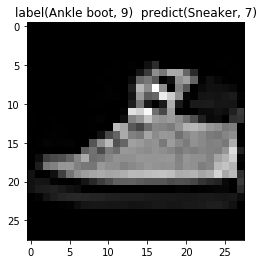

In [59]:
# x_test를 변환했기 때문에 다시 로드해야 한다.
(_, _), (xx, yy) = tf.keras.datasets.fashion_mnist.load_data()

# 전체 모델이 동일한 숫자를 예측한, 완벽하게 틀린 데이터 표시
idx = same_all[0]
show_image(xx[idx], yy[idx], binds[idx])

정확도를 높이기 위해서는<br />
정답을 예측한 모델이 있는 데이터를 집중 공략하는 것이 맞다.

In [80]:
# 정답을 맞춘 모델이 1개라도 존재하는 데이터 찾기
right_one = []
fours = []
for i in range(len(y_test)):
    if y_test[i] != binds[i] and y_test[i] in binds_preds_t[i]:
        right_one.append(i)
        c = collections.Counter(binds_preds_t[i])
        items = list(c.items())
        
        # 맞춘 회수가 4개짜리인 데이터 찾기
        # 빈도순으로 내림차순 정렬
        items_sorted = sorted(items, key=lambda i: i[1], reverse=True)
        print('{:3} : {}  {}'.format(i, y_test[i], items_sorted))

        if items_sorted[0][1] >= 5:
            items_sorted.pop(0)
        # print(items)
        
        if items_sorted[0][1] >= 4:
            fours.append((i, y_test[i], *items_sorted[0]))  # (인덱스, 정답, 예측, 회수)

print('-' * 50)
print('1개라도 맞춘 개수 :', len(right_one))    # 368
print('맞춘 횟수가 4개 :', len(fours))          # 106

print(*fours, sep='\n')

 25 : 4  [(6, 7), (2, 2), (4, 1)]
 32 : 3  [(3, 6), (1, 4)]
 89 : 6  [(2, 7), (6, 3)]
 98 : 4  [(2, 7), (4, 3)]
103 : 2  [(2, 6), (6, 4)]
107 : 9  [(9, 7), (7, 3)]
136 : 2  [(2, 6), (6, 4)]
141 : 0  [(0, 6), (6, 4)]
151 : 4  [(4, 6), (6, 3), (8, 1)]
241 : 6  [(4, 7), (6, 3)]
266 : 3  [(3, 6), (4, 4)]
271 : 3  [(6, 5), (3, 5)]
332 : 0  [(0, 4), (2, 3), (6, 2), (3, 1)]
352 : 8  [(0, 8), (8, 2)]
361 : 2  [(6, 9), (2, 1)]
378 : 4  [(3, 8), (4, 1), (6, 1)]
382 : 2  [(0, 8), (2, 2)]
404 : 4  [(3, 9), (4, 1)]
406 : 6  [(6, 7), (3, 3)]
452 : 0  [(6, 8), (0, 2)]
454 : 0  [(6, 6), (0, 4)]
460 : 3  [(0, 5), (6, 4), (3, 1)]
465 : 3  [(3, 9), (0, 1)]
511 : 2  [(6, 6), (2, 4)]
536 : 3  [(0, 7), (3, 3)]
558 : 4  [(6, 7), (4, 3)]
607 : 3  [(3, 9), (6, 1)]
628 : 6  [(0, 9), (6, 1)]
664 : 6  [(4, 9), (6, 1)]
674 : 0  [(0, 6), (3, 3), (6, 1)]
688 : 3  [(6, 5), (3, 5)]
701 : 1  [(3, 5), (1, 5)]
722 : 5  [(7, 6), (5, 4)]
753 : 3  [(0, 9), (3, 1)]
758 : 6  [(6, 9), (4, 1)]
817 : 2  [(2, 8), (4, 2)]
851 : 2 

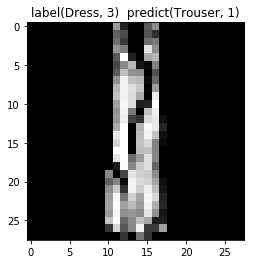

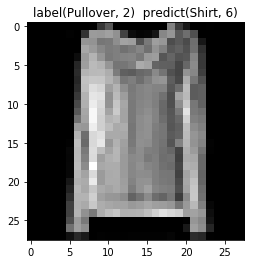

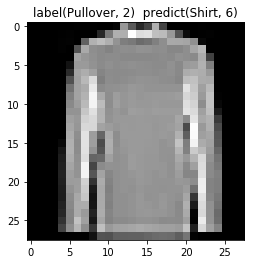

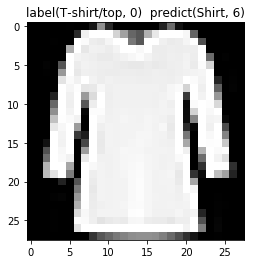

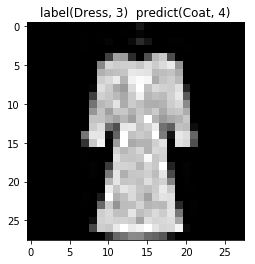

In [81]:
# 잘못 예측한 모델이 4개인 데이터 5개 표시
for idx, label, predict, count in fours[:5]:
    show_image(xx[idx], label, predict)